# PCA: A Brief Introduction

Below, I want to refresh, or even introduce some of the important mathematical tools happening behind the scenes of *Principal Component Analysis*.  These topics are common in a linear algebra setting, however their connections to practical problem solving is not always obvious.  At the end, we demonstrate the implementation with Python and the `sklearn` machine learning library.

**Important Concepts**: *Matrix*, *Eigenvalue*, *Eigenvector*, *Characteristic Polynomial*, *Covariance Matrix*.



## What is a Matrix

A matrix is a two dimensional object that we will refer to by the number of rows and number of columns.  For example, the matrix $X$ below would be referred to as a $2 \times 3$ matrix, as it has two rows and three columns.

$$X = \begin{bmatrix} 1 & 4 & -3 \\ 0 & 3 & -2 \end{bmatrix}$$ 

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [108]:
X = np.array([[1, 4, -3], [0, 3, -2]])

In [109]:
X.shape

(2, 3)

## Matrix Operations: Add, Multiply, Invert, Transpose

Because we could have different sizes of matrices, we need to be revise our usual understanding of operations.  To begin, matrices must be the same dimension to add with one another.  For example, consider the matrices $A$ and $B$ below, and which are able to be added with the matrix $X$ above.  Note that this means matrix addition happens in an element wise fashion.

$$A = \begin{bmatrix} 0 & 4 \\ 8 & -2 \end{bmatrix}  \quad B = \begin{bmatrix} 4 & 6 & 2 \\ 0 & 4 & -8 \end{bmatrix}$$

In [110]:
A = np.array([[0, 4], [8, -2]])
B = np.array([[4, 6, 2], [0, 4, -8]])

In [5]:
X + A

ValueError: operands could not be broadcast together with shapes (2,3) (2,2) 

In [6]:
X + B

array([[  5,  10,  -1],
       [  0,   7, -10]])

Matrix Multiplication happens in a way where order matters.  Again, dimension becomes a consideration.  First, we define matrix multiplication as a row by column operation.  As such, the row of the first matrix must contain the same number of elements as the column of the second.  

$$ X_{2, 3} \times Y_{3, 2}$$

In [7]:
np.matmul(X, B)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

In [8]:
np.matmul(A, B)

array([[  0,  16, -32],
       [ 32,  40,  32]])

In [9]:
X.T

array([[ 1,  0],
       [ 4,  3],
       [-3, -2]])

In [10]:
np.matmul(X, X.T)

array([[26, 18],
       [18, 13]])

In [11]:
np.linalg.inv(np.matmul(X, X.T))

array([[ 0.92857143, -1.28571429],
       [-1.28571429,  1.85714286]])

## Special Case: Eigenvector and Eigenvalue

Sometimes, multiplication of some vector $A$ by a matrix $v$ results in a scaled copy of $v$.  For example, consider 

$$\begin{bmatrix} 2 & -4 \\ -1 & 1 \end{bmatrix} \begin{bmatrix} 4 \\ -1 \end{bmatrix}$$

In [12]:
A = np.array([[2, -4], [-1, -1]])
v = np.array([[4], [-1]])
np.matmul(A, v)

array([[12],
       [-3]])

Hence, we have $$Av = \lambda v$$.

We will call $v$ the **eigenvector** of $A$ and $\lambda$ its associated **eigenvalue**.

## Characteristic Polynomial

Consider the problem where we need to determine the **eigenvalue** of a matrix, for example:

$$A = \begin{bmatrix} 1 & 2 \\ 4 & 3 \end{bmatrix}$$

This means we need to find the values that solve the equation:

$$(A - \lambda I)x = 0$$


where $I$ is the identity matrix

$$I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

Essentially, this means finding where $(A - \lambda I)$ has no inverse.  This happens when the **determinant** of $(A - \lambda I)$ is zero.  We translate this in steps as:

$$A - \lambda I $$

$$\begin{bmatrix} 1 & 2 \\ 4 & 3 \end{bmatrix} - \begin{bmatrix} \lambda & 0 \\ 0 & \lambda \end{bmatrix}$$

$$\begin{bmatrix} 1 - \lambda & 2 \\ 4 & 3 - \lambda \end{bmatrix}$$

Now, recall we have the formula for the determinant of a $2 \times 2$ matrix as

$$\begin{vmatrix} a & b \\ c & d \end{vmatrix} = ad - bc$$

so we have

$$(1 - \lambda)(3 - \lambda) - 8 = 0$$

In [13]:
A = np.array([[1, 2], [4, 3]])

In [14]:
A

array([[1, 2],
       [4, 3]])

In [15]:
np.linalg.eigvals(A)

array([-1.,  5.])

## A Basic Example

Consider two sets of observations and the data plotted below.  We want to understand the variance (or displacement from mean squared) for each set.

In [16]:
xs = [20, 17.3, 10.0, 0, -10.0, -17.3,  -20, -17.3, -10, 0, 10, 17.3]
ys = [0, 5, 8.7, 10, 8.7, 5, 0, -5, -8.7, -10, -8.7, -5.0]

In [17]:
np.std(xs)

14.133765716656454

In [18]:
np.std(ys)

7.087312607751968

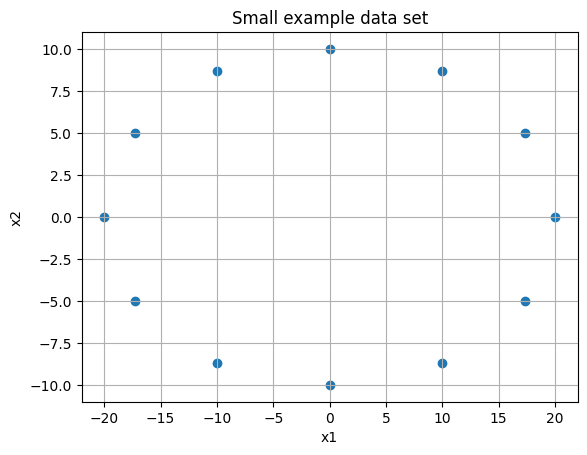

In [19]:
plt.scatter(xs, ys)
plt.grid()
plt.title('Small example data set')
plt.xlabel('x1')
plt.ylabel('x2');
plt.savefig('pca1.png', dpi = 500)

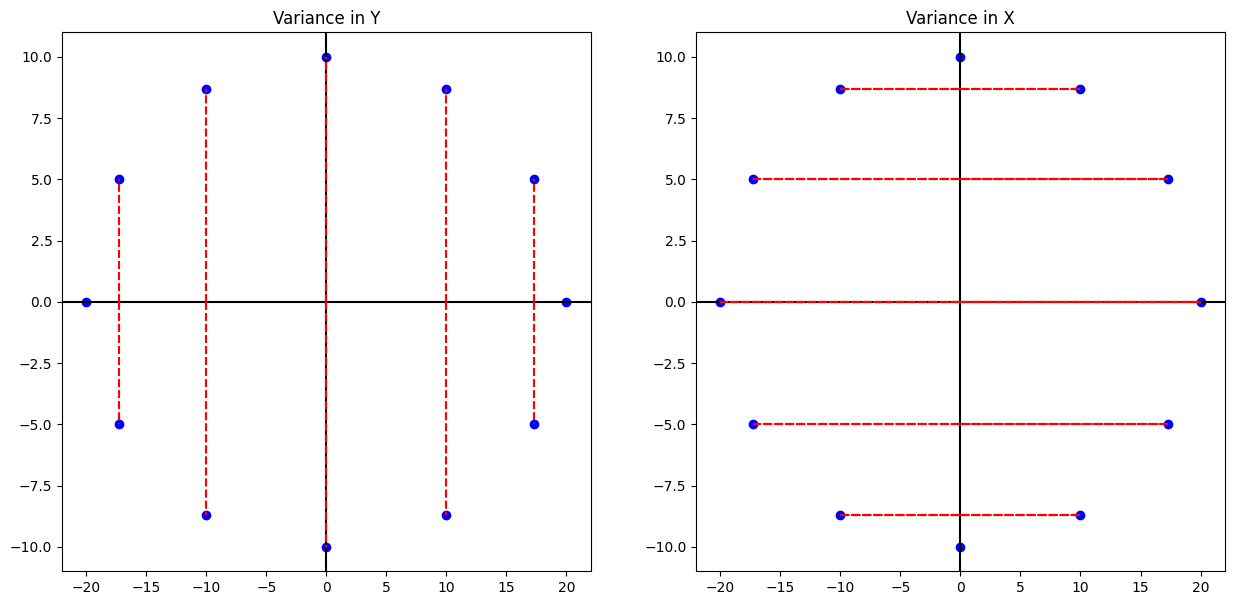

In [20]:
plt.figure(figsize = (15, 7))
plt.subplot(121)
plt.plot(xs, ys, 'o', color = 'blue')

plt.axhline(color = 'black')
plt.axvline(color = 'black')
for i in range(len(xs)):
    plt.vlines(xs[i], 0, ys[i], linestyles='--', color = 'red')
    plt.vlines(xs[i], 0, -ys[i], linestyles='--', color = 'red')
plt.title('Variance in Y')
 
plt.subplot(122)
plt.plot(xs, ys, 'o', color = 'blue')

plt.axhline(color = 'black')
plt.axvline(color = 'black')
for i in range(len(xs)):
    plt.hlines(ys[i], 0, xs[i], linestyles='--', color = 'red')
    plt.hlines(-ys[i], xs[i], -xs[i], linestyles='--', color = 'red')
plt.title('Variance in X');

In [21]:
print('The mean of the ys are {} and variance is {}'.format(np.mean(ys), np.var(ys)))

The mean of the ys are 0.0 and variance is 50.23


In [22]:
print('The mean of the xs are {} and variance is {:.2f}'.format(np.mean(ys), np.var(xs)))

The mean of the xs are 0.0 and variance is 199.76


In [23]:
M = np.array([xs, ys])

In [24]:
M.shape

(2, 12)

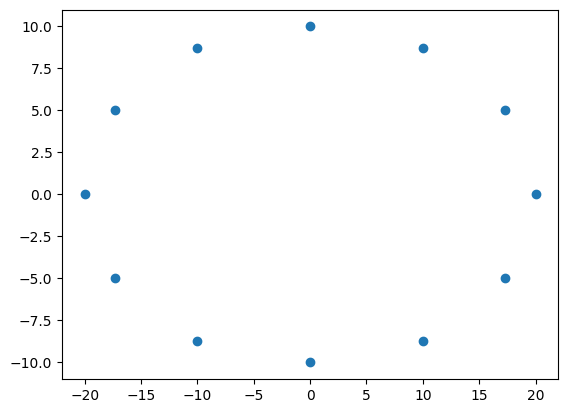

In [25]:
plt.scatter(M[0, :], M[1, :])

In [26]:
M.shape

(2, 12)

In [27]:
np.matmul(M, M.T).astype('int')

array([[2397,    0],
       [   0,  602]])

We can interpret this as telling us the eigenvalues of the original matrix.  Also, we see the largest eigenvalue is near 2400, which is associated with the eigenvector $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$, aka the $x$- axis.  The 602 is associated with the $y$-axis data.  Now, consider the situation where we don't have data perfectly symmetric with respect to the origin.

In [28]:
#rotation matrix
rot = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], [np.sin(np.pi/4), np.cos(np.pi/4)]])

In [29]:
#matrix rotated
Mr = np.matmul(rot, M)

In [30]:
C = np.matmul(Mr, Mr.T)

In [31]:
eigs = np.linalg.eig(C)

In [32]:
eigs[1]

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [33]:
print('Here, the eigenvalues are {},\nand eigenvectors are {}\nand {}'.format(eigs[0], eigs[1][0], eigs[1][1]))

Here, the eigenvalues are [2397.16  602.76],
and eigenvectors are [ 0.70710678 -0.70710678]
and [0.70710678 0.70710678]


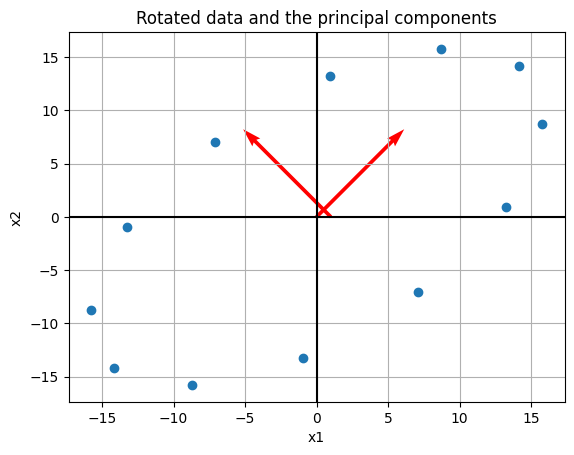

In [34]:
#ax1 = [np.linalg.eig(C)[1][0][0] * i  + np.linalg.eig(C)[1][0][1] for i in xs]
plt.scatter(Mr[0, :], Mr[1, :])
#plt.plot(xs, ax1, '--', color = 'red')
plt.quiver(eigs[1][0], eigs[1][1], scale = 4, color = 'red')
plt.axhline(color = 'black')
plt.axvline(color = 'black')
plt.grid()
plt.title('Rotated data and the principal components')
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('pca2a.png')

Thus, we've still identified the same axis as the principal components, and if we want the one with greatest variance it would be our rotated $x$-axis.

## Variance

To actually carry out the PCA, we want to consider the **covariance matrix**.  In the example below, we take a matrix $X$, mean center it, and compute its (sample) **covariance matrix** as

$$S = \frac{1}{N-1}BB^T $$

Consider the example where we have four observations about some population as follows:

$$X_1 = \begin{bmatrix} 1 \\ 2 \\ 1  \end{bmatrix} \quad X_2 = \begin{bmatrix} 4 \\ 2 \\ 13  \end{bmatrix} \quad
X_3 = \begin{bmatrix}  7 \\ 8 \\ 1 \end{bmatrix} \quad X_4 =  \begin{bmatrix} 8 \\ 4 \\ 5   \end{bmatrix} $$

In [35]:
#make above into a matrix
X = np.array([[1, 4, 7, 8], [2, 2, 8, 4], [1, 13, 1, 5]])

In [36]:
X

array([[ 1,  4,  7,  8],
       [ 2,  2,  8,  4],
       [ 1, 13,  1,  5]])

In [37]:
#mean across rows
M = X.mean(axis = 1)

In [38]:
M

array([5., 4., 5.])

In [39]:
#mean center data
B = X - M.reshape(-1,1)

In [40]:
B.shape

(3, 4)

In [41]:
#sample covariance matrix
S = 1/(B.shape[1]-1) * np.matmul(B, B.T)

In [42]:
S

array([[10.,  6.,  0.],
       [ 6.,  8., -8.],
       [ 0., -8., 32.]])

In [43]:
np.linalg.eigvals(S)

array([ 1.60571114, 13.84296424, 34.55132462])

Here, we can interpret the larger **eigenvalue** corresponding to the vector with the largest **variance**.  In **PCA**, if we wanted one principal component, we would identify the third column as such.  Typically, we will have much of this obscured when we implement **PCA** using a computer.  

The main idea is that given some matrix of observations $[X_1, X_2, ... , X_p]$, we mean center this, and find a matrix $P = [u_1, u_2, ..., u_p]$ that determine a change of variable $X = PY$ or 

$$\begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_p \end{bmatrix} = \begin{bmatrix} u_1 & u_2 & ... & u_p \end{bmatrix} \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_p \end{bmatrix}$$

where the variables $y_1, ..., y_p$ are not correlated and arranged by decreasing variance.

## Implementing PCA with Python and `sklearn`

Now, we see two ways to implement **PCA** using Python and the `sklearn` library.  We have the choice of determining the number of components in advance, declaring the cutoff for how much variance we would like, or simply seeing the amount of variance explained by each and making a decision based on this output.

For this example we will consider a dataset containing observations about houses in the Boston area.

In [46]:
from sklearn.datasets import fetch_olivetti_faces

In [48]:
faces = fetch_olivetti_faces()

In [60]:
print(faces['DESCR'])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

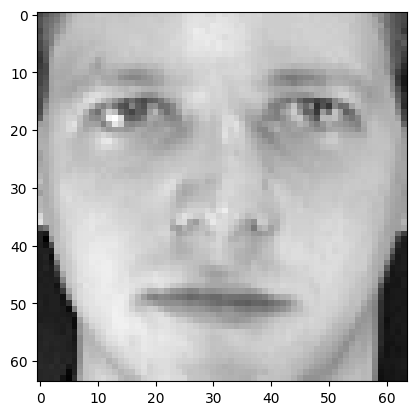

In [52]:
plt.imshow(faces['images'][0], cmap = 'gray')

In [54]:
faces['data'][0].shape

(4096,)

In [58]:
X = faces['data']

In [59]:
y = faces['target']

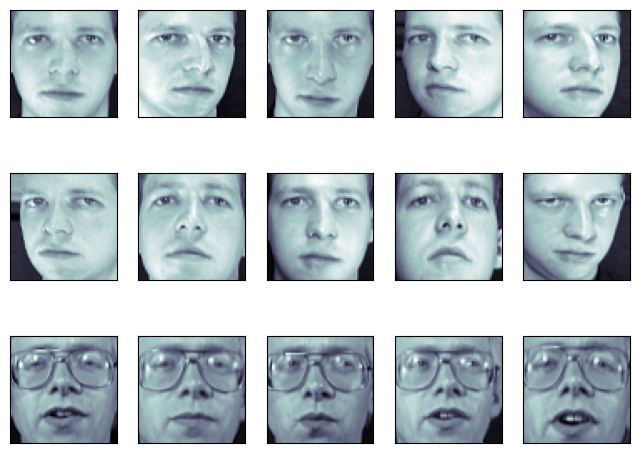

In [102]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X[i].reshape(image_shape), cmap=plt.cm.bone)
    

In [61]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca_none = pca.fit_transform(X)

In [62]:
df_pca_none

array([[ 6.4326015e+00,  7.0367694e-01, -1.4300253e+00, ...,
         2.6564749e-02,  9.4170114e-03, -9.8621776e-06],
       [ 1.0759029e+00,  6.6973338e+00,  1.8428063e+00, ...,
        -3.9317471e-04, -1.0404934e-02, -9.8627679e-06],
       [ 5.2929497e+00,  1.5425032e+00,  2.2595981e-01, ...,
        -2.4333008e-02, -7.9374071e-03, -9.8626924e-06],
       ...,
       [-2.0407648e+00,  1.5096118e+00,  3.4487305e+00, ...,
         2.1402145e-02, -3.7093335e-03, -9.8619394e-06],
       [ 5.1652217e+00, -8.0967598e+00, -6.7101026e-01, ...,
        -8.2222950e-03,  1.6309062e-02, -9.8620803e-06],
       [ 1.1505016e+00, -2.4350321e+00,  1.1894926e+00, ...,
         1.1126069e-02,  2.7804174e-02, -9.8623996e-06]], dtype=float32)

In [64]:
#these numbers are decreasing in terms of 
#how much variance is explained, they are not in order 
#as the features
[i.round(2) for i in pca.explained_variance_ratio_][:10]

[0.24, 0.14, 0.08, 0.05, 0.04, 0.03, 0.02, 0.02, 0.02, 0.02]

In [65]:
#here we only keep the top component
pca = PCA(n_components=1)
df_pca_1 = pca.fit_transform(X)

In [66]:
pd.DataFrame(df_pca_1, columns = ['Principal Component']).head()

Principal Component
0             6.432607
1             1.075894
2             5.292948
3             4.253577
4             3.962007

In [67]:
#variance explained
pca.explained_variance_ratio_

array([0.23812729], dtype=float32)

In [68]:
#if we want to keep 95 percent of variance in original data
#how many features do we need?
pca = PCA(0.95)
df_pca_ninetyfive_percent = pca.fit_transform(X)

In [69]:
#seems we can reduce the features quite a bit!
pd.DataFrame(df_pca_ninetyfive_percent).head()

0          1         2         3         4         5         6    \
0  6.432601   0.703677 -1.430025  1.278523 -2.564395 -0.950594 -2.081773   
1  1.075903   6.697334  1.842806  5.082053 -0.730572 -1.755451  1.575947   
2  5.292950   1.542503  0.225960  1.111251 -2.640083 -1.674552 -2.232214   
3  4.253563 -11.327764  0.091844 -0.220428 -1.407451 -0.828456  1.170797   
4  3.962011   3.293870  3.652863  3.553489 -2.785638 -1.815462  1.152088   

        7         8         9    ...       113       114       115       116  \
0  2.937939 -0.373889 -0.243126  ...  0.053730 -0.020700  0.164669 -0.227838   
1  2.100697 -1.072458 -2.061425  ... -0.212974 -0.073980 -0.031484 -0.046782   
2  3.189343 -1.565537 -0.599985  ... -0.424761  0.079386 -0.003923 -0.000485   
3  0.395940 -0.189314 -0.112226  ... -0.150361 -0.042524 -0.188622 -0.084824   
4  1.140850 -1.095520 -1.024139  ...  0.270415 -0.334221 -0.183021 -0.130896   

        117       118       119       120       121       122  
0  0.055841  0.074256  0.086050 -0.379610 -0.276585 -0.162568  
1 -0.267977  0.437365 -0.249701 -0.032457  0.272344  0.475458  
2  0.174534  0.267647 -0.148929  0.163957  0.251085 -0.249365  
3 -0.234410 -0.164788 -0.068787 -0.024283 -0.408592 -0.029497  
4  0.052209  0.377321  0.542764  0.131786  0.016446  0.518832  

[5 rows x 123 columns]

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

In [72]:
X = X/255.
xt = pca.fit_transform(X)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [77]:
knn.score(X_test, y_test)

0.98

In [78]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 36, 37, 38, 39])

In [79]:
from sklearn.pipeline import Pipeline

In [80]:
pipe = Pipeline([('pca', PCA(.8)), ('knn', KNeighborsClassifier(n_neighbors=1))])

In [81]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=0.8)),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [82]:
pipe.score(X_test, y_test)

0.97

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay

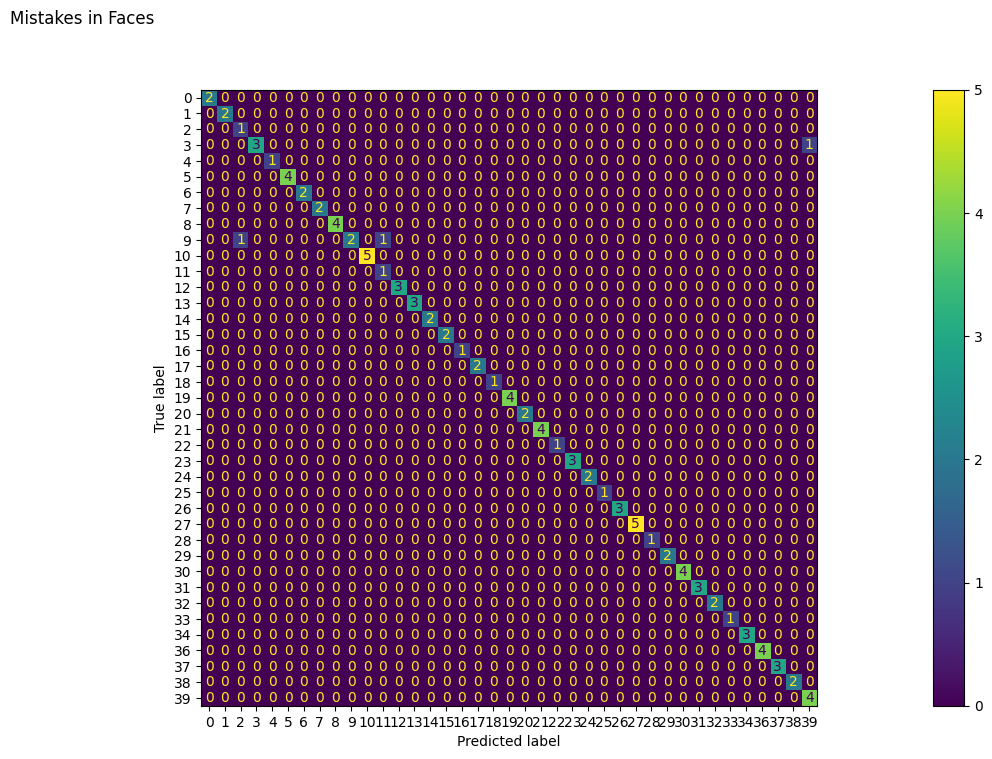

In [96]:
fig, ax = plt.subplots(figsize = (30, 8))
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, ax = ax)
fig.suptitle('Mistakes in Faces');

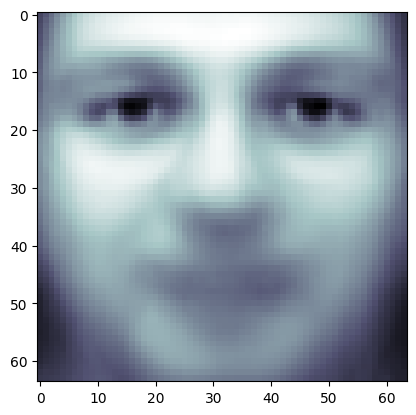

In [84]:
plt.imshow(pipe.named_steps['pca'].mean_.reshape(64, 64),
          cmap = plt.cm.bone)

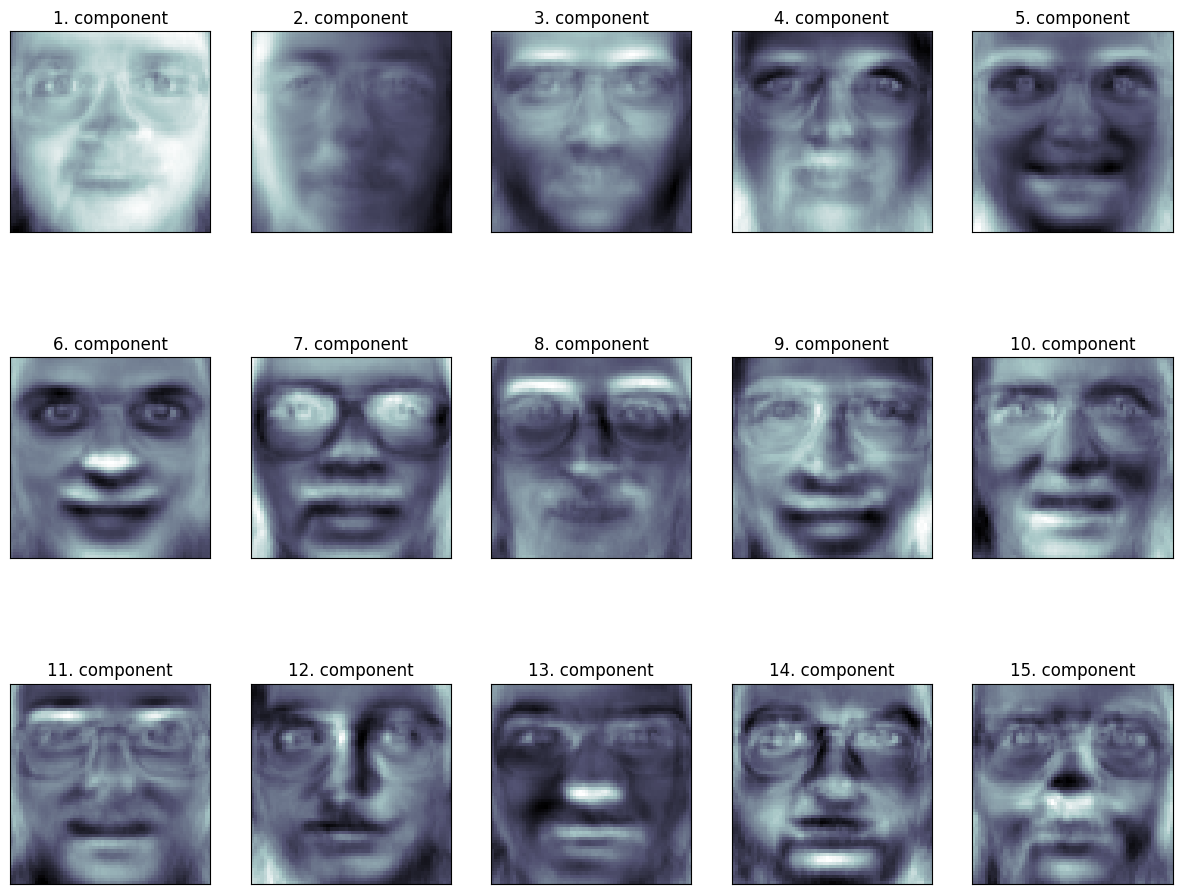

In [87]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(64,64),
              cmap=plt.cm.bone)
    ax.set_title("{}. components".format((i + 1)))

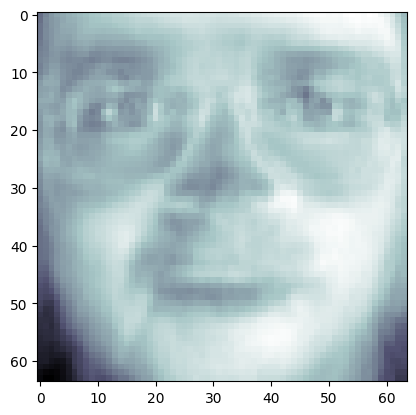

In [100]:
image_shape = (64, 64)
plt.imshow(pca.components_[0, :].reshape(image_shape), cmap = 'bone')

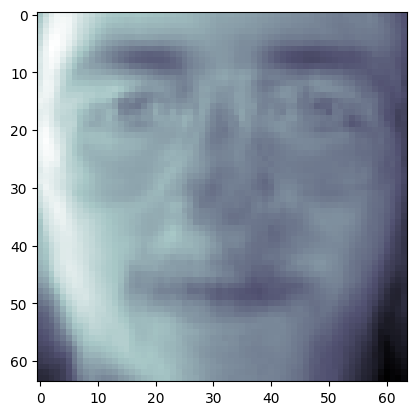

In [101]:
plt.imshow((pca.components_[0, :] + pca.components_[1, :]).reshape(image_shape), cmap = 'bone')

#### Problem: Handwritten Digits

In [103]:
from sklearn.datasets import load_digits

In [104]:
digits = load_digits()

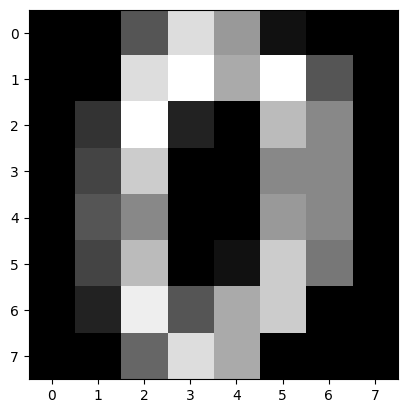

In [106]:
plt.imshow(digits.data[0].reshape(8, 8), cmap = 'gray')

In [ ]:
X = digits.data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)